**(1) To evaluate the impact of the fitness function in terms of prediction quality and tree size for traditional GSGP.**

Experimental Setup:

10 (will be 30 for the final version) Monte Carlo Runs for 18 Datasets with the fixed configurations:


config_all = {

    'pop_size': 50, #will be 200 for final version
    'n_iter': 300,  #will be 2000 for final version
    'elitism': True,
    'n_elites': 1,
    'init_depth': 6,
    'initializer': 'rhh',
    'tournament_size': 2,
    'prob_const': 0.2,
    'tree_functions': ['add', 'subtract', 'multiply', 'divide'],
    'tree_constants': np.linspace(-10, 10, num=201).round(1).tolist(),
    'fitness_function': sigmoid_rmse,
    'minimization' : True,
    'seed': None, #based on monte_carlo_run
    'log_path' : None, #based on monte_carlo_run
    'verbose': False,
    'log_level': 0,
    'test_elite': True

}

basic_config_slim= {

    'slim_version': None, #for all versions
    'ms_lower': 0,
    'ms_upper': 1,
    'p_inflate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'reconstruct': True,
    'copy_parent': True

}


In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
from analysis import *
import numpy as np

In [2]:
%%capture
ana_fitness = FitnessAnalysis('fitness')

In [3]:
ana_fitness.wtl_1v1

Metric,Fitness Function,Accuracy,F1-Score,ROC-AUC,Tree Size
0,Accuracy vs F1-Score,3-7-0,0-9-1,1-7-2,0-9-1
1,Accuracy vs RMSE,0-7-3,0-7-3,0-6-4,9-1-0
2,Accuracy vs WRMSE,4-5-1,0-6-4,0-4-6,9-1-0
3,F1-Score vs RMSE,0-4-6,1-6-3,0-7-3,9-1-0
4,F1-Score vs WRMSE,2-6-2,0-8-2,0-6-4,9-1-0
5,RMSE vs WRMSE,3-7-0,0-8-2,0-10-0,2-7-1


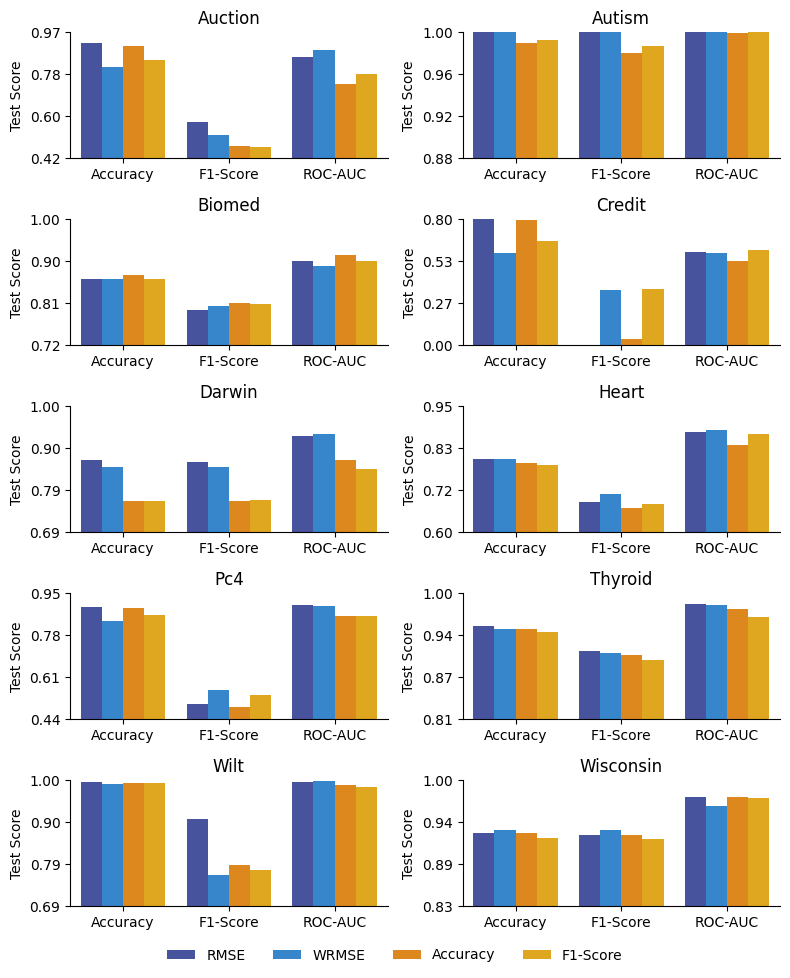

In [4]:
ana_fitness.performance_plot[0]

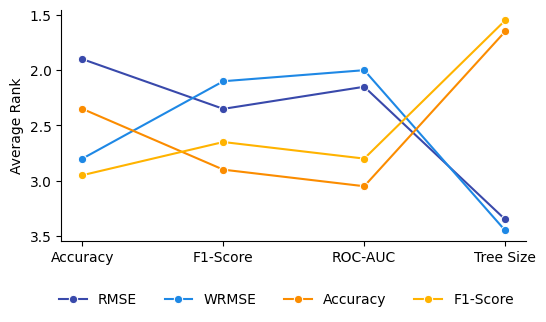

In [5]:
ana_fitness.ranks_plot[0]

In [6]:
ana_fitness.friedman_pvalues

,Metric,P-Value,Significant
0,Accuracy,0.012791,Yes
1,F1-Score,0.050654,No
2,ROC-AUC,0.011568,Yes
3,Tree Size,0.000015,Yes


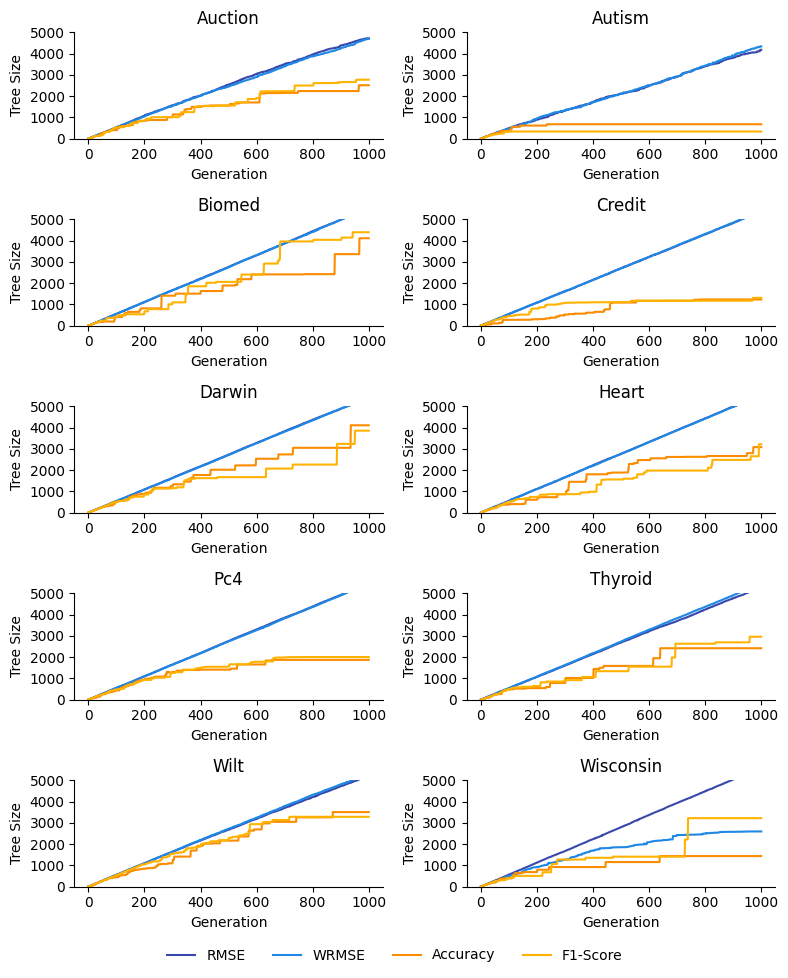

In [7]:
ana_fitness.tree_size_evolution_plot[0]